<h2><font color="#004D7F" size=6>Procesamiento de datos para MD (Parte II)</font></h2>



<h1><font color="#004D7F" size=5>Métodos de Remuestreo</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Validación cruzada](#section2)
    * [2.1. _k_-fold Cross Validation](#section21)
    * [2.2. Validación cruzada repetida](#section22)
    * [2.3. Validación cruzada dejando uno fuera](#section23)
* [3. División en porcentaje](#section3)
    * [3.1. División en porcentaje train/test](#section31)
    * [3.2. División train/test repetidos aleatoriamente](#section32)
* [4. Qué técnica usar](#section4)

---
<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

La evaluación es una estimación que podemos usar para hablar sobre qué tan bien creemos que el algoritmo realmente puede funcionar en la práctica. No es una garantía de rendimiento. Una vez que estimamos el rendimiento de nuestro algoritmo, podemos volver a entrenar el algoritmo final en todo el conjunto de datos de entrenamiento y prepararlo para su uso operativo. A continuación, veremos cuatro técnicas diferentes que podemos usar para dividir nuestro conjunto de datos de entrenamiento para su posterior evaluación y crear estimaciones útiles de rendimiento para nuestros algoritmos de Machine Learning:
* Cómo dividir un conjunto de datos en subconjuntos por porcentaje para entrenamiento/validación.
* Cómo evaluar la robustez del modelo utilizando la validación cruzada, k-fold, con y sin repeticiones.
* Cómo evaluar la robustez del modelo usando una validación cruzada dejando uno fuera (LOOCV).
* División en train/test repetidos aleatoriamente.

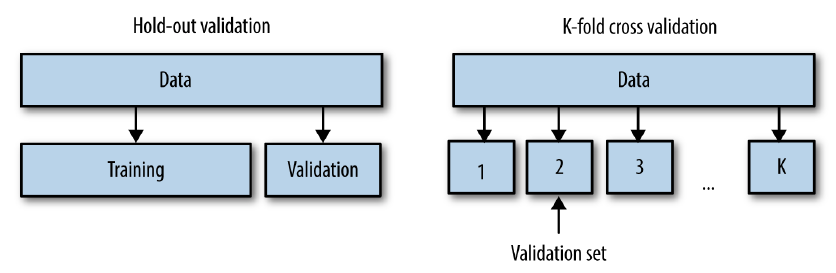

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Como siempre cargamos el CSV que vamos a utilizar. Así mismo, vamos a cargar las librerías principales que utilizaremos.

In [2]:
import pandas as pd
import numpy as np

ruta = 'data/pima-indians-diabetes.csv'

nombres = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(ruta, names=nombres)

array = df.values
X = array[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y = array[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [4]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,627.00,50,1
1,1,85,66,29,0,26.6,351.00,31,0
2,8,183,64,0,0,23.3,672.00,32,1
3,1,89,66,23,94,28.1,167.00,21,0
4,0,137,40,35,168,43.1,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1


In [6]:
X

array([[  6. , 148. ,  72. , ...,  33.6, 627. ,  50. ],
       [  1. ,  85. ,  66. , ...,  26.6, 351. ,  31. ],
       [  8. , 183. ,  64. , ...,  23.3, 672. ,  32. ],
       ...,
       [  5. , 121. ,  72. , ...,  26.2, 245. ,  30. ],
       [  1. , 126. ,  60. , ...,  30.1, 349. ,  47. ],
       [  1. ,  93. ,  70. , ...,  30.4, 315. ,  23. ]])

In [8]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Validación cruzada</font>

La validación cruzada es un proceso en la que se realizan $K$ particiones o **folds** de la base de datos y con ellos se realizan $K$ evaluaciones diferentes, de tal forma que todos los casos por lo menos una vez se encuentran en el conjunto de test. Básicamente en la evaluación $i$, la partición $i$ son los casos de test y el resto son los casos de entrenamiento. Los datos de test se distribuyen equitativamente para cada partición. Finalmente, se realiza una media de los resultados obtenidos en las diferentes evaluaciones. En la siguiente imagen se ve un ejemplo de esto.

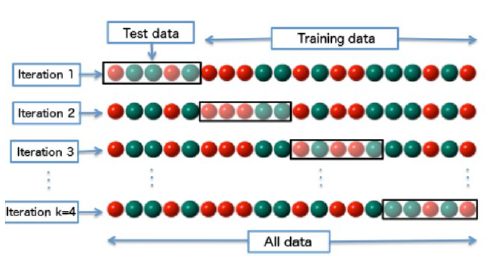

<a id="section21"></a>
## <font color="#004D7F"> 2.1. _k_-fold Cross Validation</font>

El método de validación cruzada de _k-fold_ implica dividir el conjunto de datos en _k_-particiones, también llamados _fold_. Cada subconjunto se mantiene mientras el modelo se entrena en todas los demás particiones. Este proceso se repite hasta que se determina la precisión para cada instancia en el conjunto de datos, y se proporciona una estimación de precisión general. Es un método robusto para estimar la precisión, y el tamaño de _k_ puede ajustar la cantidad de sesgo en la estimación, con valores populares establecidos en 5 y 10. 

Puede ver que informamos tanto la media como la desviación estándar de la medida de rendimiento. Al resumir las medidas de rendimiento, es una buena práctica resumir la distribución de las medidas, en este caso suponiendo una distribución gaussiana del rendimiento y registrando la desviación estándar y media.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10
seed = 7 # seed=semilla

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression(max_iter=1000)

resultado = cross_val_score(model, X, y, cv=kfold) # El resultado es un array de NumPy
print(f"Accuracy: {resultado.mean()*100.0:.2f}%")
print(f"Desviación Estándar: {resultado.std()*100.0:.2f}%")

Accuracy: 77.34%
Desviación Estándar: 4.90%


In [33]:
resultado

array([0.81818182, 0.75324675, 0.71428571, 0.83116883, 0.80519481,
       0.77922078, 0.67532468, 0.80519481, 0.81578947, 0.73684211])

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold).
</div>

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Validación cruzada repetida</font>

Una extensión de esta técnica de entrenamiento/validación es el poder repetir varias veces el proceso de dividir los datos _k-fold_. En este caso, la precisión final del modelo se toma como la media del número de repeticiones.

Al igual que el caso anterior podemos observar que nos informa tanto la media como la desviación estándar de la medida de rendimiento.

In [10]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10
seed = 7 # seed=semilla
num_repeats = 5

repeatedkfold = RepeatedKFold(n_splits=num_folds, random_state=seed, n_repeats
=num_repeats)
model = LogisticRegression(max_iter=1000)

resultado = cross_val_score(model, X, y, cv=repeatedkfold) # El resultado es un array de NumPy
print(f"Accuracy: {resultado.mean()*100.0:.2f}%")
print(f"Desviación Estándar: {resultado.std()*100.0:.2f}%")

Accuracy: 77.32%
Desviación Estándar: 4.15%


In [12]:
resultado

array([0.81818182, 0.75324675, 0.71428571, 0.83116883, 0.80519481,
       0.77922078, 0.67532468, 0.80519481, 0.81578947, 0.73684211,
       0.80519481, 0.67532468, 0.76623377, 0.66233766, 0.81818182,
       0.84415584, 0.77922078, 0.77922078, 0.81578947, 0.75      ,
       0.76623377, 0.77922078, 0.74025974, 0.77922078, 0.80519481,
       0.74025974, 0.79220779, 0.80519481, 0.77631579, 0.76315789,
       0.77922078, 0.79220779, 0.79220779, 0.72727273, 0.75324675,
       0.80519481, 0.72727273, 0.76623377, 0.78947368, 0.80263158,
       0.76623377, 0.79220779, 0.72727273, 0.72727273, 0.71428571,
       0.83116883, 0.79220779, 0.75324675, 0.82894737, 0.81578947])

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`RepeatedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html?highlight=kfold#sklearn.model_selection.RepeatedKFold).
</div>

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Validación cruzada dejando uno fuera</font>

En Validación cruzada dejando uno fuera (Leave One Out Cross Validation, LOOCV), se omite una instancia de datos y se construye un modelo en todas las demás instancias de datos en el conjunto de entrenamiento, repitiéndose este proceso para todas las instancias de datos. El resultado es una gran cantidad de medidas de rendimiento que se pueden resumir en un esfuerzo por proporcionar una estimación más razonable del _Accuracy_ de su modelo. 

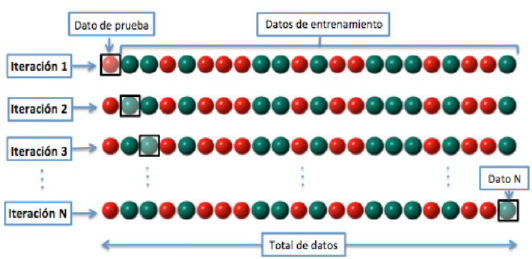

Puede ver en la desviación estándar que la puntuación tiene más varianza que los resultados de validación cruzada _k-fold_ descritos anteriormente.

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

loocv = LeaveOneOut()
model = LogisticRegression(max_iter=1000)

resultado = cross_val_score(model, X, y, cv=loocv) # El resultado es un array de NumPy
print(f"Accuracy: {resultado.mean()*100.0:.2f}%")
print(f"Desviación Estándar: {resultado.std()*100.0:.2f}%")

Accuracy: 77.47%
Desviación Estándar: 41.78%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html?highlight=leaveoneout#sklearn.model_selection.LeaveOneOut).
</div>

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. División en porcentaje</font>

<a id="section31"></a>
## <font color="#004D7F"> 3.1. División en porcentaje train/test</font>

La división de datos implica la partición de los datos en un conjunto de datos de entrenamiento explícito utilizado para preparar el modelo y un conjunto de datos de validación invisible (se dice validación invisible ya que aunque se conozca el atributo clase el modelo lo omitirá para una vez realizada la predicción compararlo para ver si ha acertado) que se utiliza para evaluar el rendimiento del modelo en datos no etiquetados. 

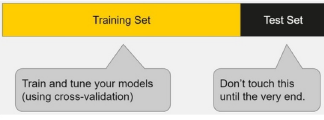

En el ejemplo a continuación, dividimos el conjunto de datos de los indios Pima en divisiones de 67%/33% para entrenamiento y prueba y evaluar el _Accuracy_ de un modelo Logistic Regression.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size = 0.33  # Estoy indicando que el 33% de mi conjunto de datos sea de prueba
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
resultado = model.score(X_test, y_test)

print(f"Accuracy: {resultado*100.0:.2f}%")

Accuracy: 78.74%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split).
</div>

<a id="section32"></a>
## <font color="#004D7F"> 3.2. División train/test repetidos aleatoriamente</font>

Otra variación en la validación cruzada de k-fold es crear una división aleatoria de los datos como la división de train/test descrita anteriormente, pero repetir el proceso de división y evaluación del algoritmo varias veces, como la validación cruzada. El siguiente ejemplo divide los datos en una división de train/test del 67%/33% y repite el proceso 10 veces.

Podemos ver que en este caso la distribución de la medida de desempeño está a la par con _k_-fold cross validation pero reducimos la varianza considerablemente.

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10
seed = 7 # seed=semilla
test_size = 0.33

shufflesplit = ShuffleSplit(n_splits=num_folds, random_state=seed, test_size
=test_size)
model = LogisticRegression(max_iter=1000)

resultado = cross_val_score(model, X, y, cv=shufflesplit) # El resultado es un array de NumPy
print(f"Accuracy: {resultado.mean()*100.0:.2f}%")
print(f"Desviación Estándar: {resultado.std()*100.0:.2f}%")

Accuracy: 76.61%
Desviación Estándar: 2.32%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html?highlight=shufflesplit#sklearn.model_selection.ShuffleSplit).
</div>

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Qué técnica usar</font>

Se enumeran algunos consejos para considerar qué técnica de remuestreo usar en diferentes circunstancias:
* Por lo general, la validación cruzada de _k-fold_ es el estándar defacto para evaluar el rendimiento de un algoritmo en datos no etiquetados con _k_ configurado en 3, 5 o 10.
* El uso de una división de train/test es buena para la velocidad cuando se usa un algoritmo lento y produce estimaciones de rendimiento con un sesgo más bajo cuando se usan conjuntos de datos grandes.
* Las técnicas como LOOCV y las divisiones aleatorias repetidas pueden ser intermedios útiles cuando se trata de equilibrar la variación en el rendimiento estimado, la velocidad de entrenamiento del modelo y el tamaño del conjunto de datos.

El mejor consejo es experimentar y encontrar una técnica para su problema que sea rápida y produzca estimaciones razonables de rendimiento que pueda usar para tomar decisiones. En caso de duda, utilice la validación cruzada con un _k-fold_ de 10.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>